In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

#-----------------------------------------------------------------------

#  select random points
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

#
## centroid function
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

## centroid maker
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids
#
## k means function
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

#
#
#
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
#    print('cov \n', cov)
#    print()
    # perform SVD
    U, S, V = np.linalg.svd(cov) # singular value decomposition
    
    return U, S, V

def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)



def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)


(5000, 1024)


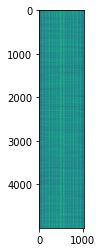

In [2]:
# Apply PCA on faces

faces = loadmat('ex7faces.mat')
X = faces['X']
print(X.shape)
plt.imshow(X)

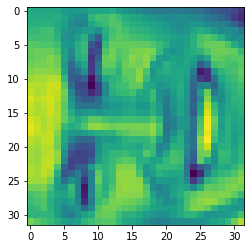

In [3]:

#show one face
face = np.reshape(X[41,:], (32, 32))
plt.imshow(face)


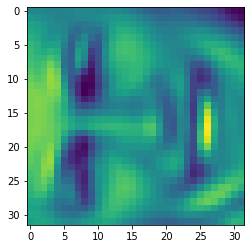

In [4]:

U, S, V = pca(X)
Z = project_data(X, U, 100)

X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[41,:], (32, 32))
plt.imshow(face)
